In [48]:
# Import Qiskit library
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
# Adding the transpiler to reduce the circuit to QASM instructions
# supported by the backend
from qiskit import transpile
# Use Aer's qasm_simulator
from qiskit.providers.aer import QasmSimulator
from math import pi

In [49]:
qr = QuantumRegister(3, 'q13')
cr = ClassicalRegister(3, 'c')
qc = QuantumCircuit(qr, cr)

# Gates
qc.h(0)
qc.y(1)
qc.h(2)
qc.cx(0,1)
qc.ccx(0,1,2)
qc.z(1)
qc.rz(pi/5, 2)

#Measure
qc.measure(range(3),range(3))

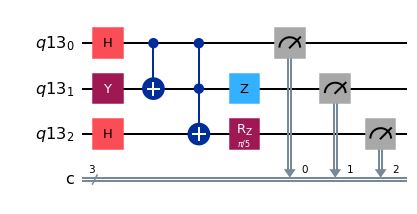

In [50]:
qc.draw('mpl', style='iqx')

In [51]:
backend = QasmSimulator()
# First we have to transpile the quantum circuit
# to the low-level QASM instructions used by the
# backend
qc_compiled = transpile(qc, backend)

# Execute the circuit on the qasm simulator.
# We've set the number of repeats of the circuit
# to be 1024, which is the default.
job_sim = backend.run(qc_compiled, shots=1024)

# Grab the results from the job.
result_sim = job_sim.result()

In [52]:
print(result_sim.get_counts(qc_compiled))

{'110': 273, '101': 233, '010': 262, '001': 256}


In [53]:
qr = QuantumRegister(3, 'q13')
cr = ClassicalRegister(3, 'c')
qc = QuantumCircuit(qr, cr)

# Gates
qc.h(0)
qc.y(1)
qc.h(2)
qc.cx(0,1)
qc.ccx(0,1,2)
qc.z(1)
qc.z(2)
qc.p(-pi*4/5,2)




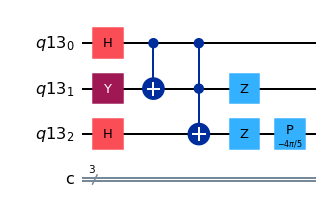

In [54]:
qc.draw('mpl', style='iqx')

In [55]:
#Measure
qc.measure(range(3),range(3))

In [56]:
backend = QasmSimulator()
# First we have to transpile the quantum circuit
# to the low-level QASM instructions used by the
# backend
qc_compiled = transpile(qc, backend)

# Execute the circuit on the qasm simulator.
# We've set the number of repeats of the circuit
# to be 1024, which is the default.
job_sim = backend.run(qc_compiled, shots=1024)

# Grab the results from the job.
result_sim = job_sim.result()

In [57]:
print(result_sim.get_counts(qc_compiled))

{'001': 276, '101': 252, '110': 230, '010': 266}
